<a href="https://colab.research.google.com/github/RagcoonTycoon/practice.revou/blob/master/Copy_of_Capstone_Project_Rico_Alexander_Gwee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install PIP
!pip install langchain_community
!pip install replicate
!pip install kaggle
!pip install pandas matplotlib seaborn

In [ ]:
# Access Replicate
from langchain_community.llms import Replicate
from google.colab import userdata
import os
# Access Kaggle dataset (download CSV to upload file)
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
# Get API token from Replicate account
api_token = userdata.get("IBMTest")
# Insert API token to enviroment variable (ennv)
os.environ['REPLICATE_API_TOKEN'] = api_token
# Arrange parameters
parameters = {
    "top-k": 5,
    "top_p": 1.0,
    "max_tokens": 2000,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 2.0,
    "temperature": 0.5,
    "stopping_criteria": "length (250 tokens)",
    "stopping_sequence": None
}
# Select LLM (Large Language Model)
llm = Replicate(
    model = "ibm-granite/granite-3.3-8b-instruct",
    model_kwargs = parameters
)
# Read CSV with semicolon delimiter
import pandas as pd
df = pd.read_csv(filename, delimiter=';')
ai_revenue = df[['Year', 'AI Software Revenue (in Billions)']]
ai_market_value = df[['Year', 'Global AI Market Value (in Billions)']]
ai_adoption = df[['Year', 'AI Adoption (%)']]
ai_risk_of_automation = df[['Year', 'Jobs at High Risk of Automation - Transportation & Storage (%)',
'Jobs at High Risk of Automation - Wholesale & Retail Trade (%)', 'Jobs at High Risk of Automation - Manufacturing (%)']]

# Build prompts
prompt_1 = f"""Classify each AI Software Revenue entry into one of the following non-overlapping categories:
1. Low: Revenue ≤ 25 (in Billions)
2. Medium: 25 < Revenue ≤ 50 (in Billions)
3. High: Revenue > 50 (in Billions)
Respond with this strict format without any explanation:
Year | Revenue (in Billions) | Category
Use only the data provided below:
{ai_revenue.to_string(index=False)}"""
prompt_2 = f"""Classify each Global AI Market Value entry into one of the following non-overlapping categories:
1. Emerging: Market Value ≤ 50 (in Billions)
2. Stable: 50 < Market Value ≤ 200 (in Billions)
3. Mature: Market Value > 200 (in Billions)
Respond with this strict format without any explanation:
Year | Market Value (in Billions) | Category
Use only the data provided below:
{ai_market_value.to_string(index=False)}"""
prompt_3 = f"""Classify each AI Adoption percentage into one of the following non-overlapping categories:
1. Slow Adoption: Adoption Percentage ≤ 25%
2. Moderate Adoption: 25% < Adoption Percentage ≤ 50%
3. Fast Adoption: Adoption Percentage > 50%
Respond with this strict format without any explanation:
Year | Adoption Percentage | Category
Use only the data provided below:
{ai_adoption.to_string(index=False)}"""
prompt_4 = f"""Describe the top 5 best and worst possibility of each jobs at risk of automation especially on transportation & storage,
wholesale & retail trade, and manufacturing in the form of key points based on the data provided only below:
{ai_risk_of_automation.to_string(index=False)}"""
prompt_5 = f"""Summarize the data provided below while elaborating it on top 10 key points:
{df.to_string(index=False)}"""
prompt_6 = f"""Specify in detail 2 best reccomendations to overcome job loss and high risk of automation caused by AI based of the data provided below, no more than 50 words each:
{df.to_string(index=False)}"""

# Print output
print('Processing Prompt 1...')
output_1 = llm.invoke(prompt_1)
print('Output 1')
print(output_1)
print('Processing Prompt 2...')
output_2 = llm.invoke(prompt_2)
print('Output 2')
print(output_2)
print('Processing Prompt 3...')
output_3 = llm.invoke(prompt_3)
print('Output 3')
print(output_3)
print('Processing Prompt 4...')
output_4 = llm.invoke(prompt_4)
print('Output 4')
print(output_4)
print('Processing Prompt 5...')
output_6 = llm.invoke(prompt_6)
print('Output 5')
print(output_6)

Saving The Rise of Artificial Intelligence.csv to The Rise of Artificial Intelligence (7).csv
Processing Prompt 1...
Output 1
Year | Revenue (in Billions) | Category
2018 | 10.10 | Low
2019 | 14.69 | Low
2020 | 22.59 | Low
2021 | 34.87 | Medium
2022 | 51.27 | Medium
2023 | 70.94 | High
2024 | 94.41 | High
2025 | 126.00 | High
Processing Prompt 2...
Output 2
| Year | Global AI Market Value (in Billions) | Category      |
|------|---------------------------------------|---------------|
| 2018 | 29.5                                  | Emerging      |
| 2019 | 35.0                                  | Emerging      |
| 2020 | 45.0                                  | Emerging      |
| 2021 | 65.0                                  | Stable        |
| 2022 | 140.0                                 | Mature        |
| 2023 | 279.0                                 | Mature        |
| 2024 | 400.0                                 | Mature        |
| 2025 | 1810.0                                | Mature 

Saving The Rise of Artificial Intelligence.csv to The Rise of Artificial Intelligence (5).csv


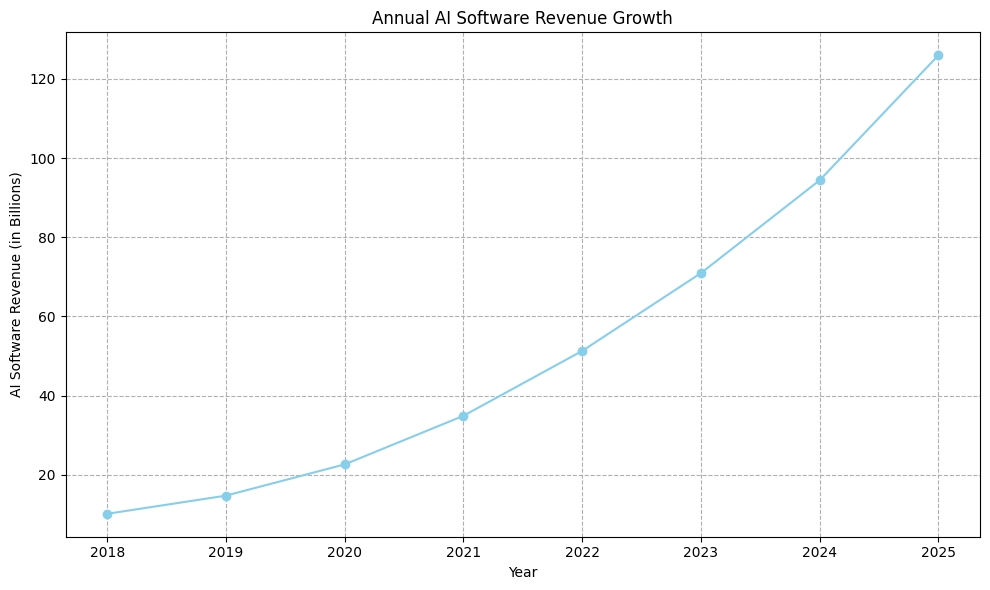

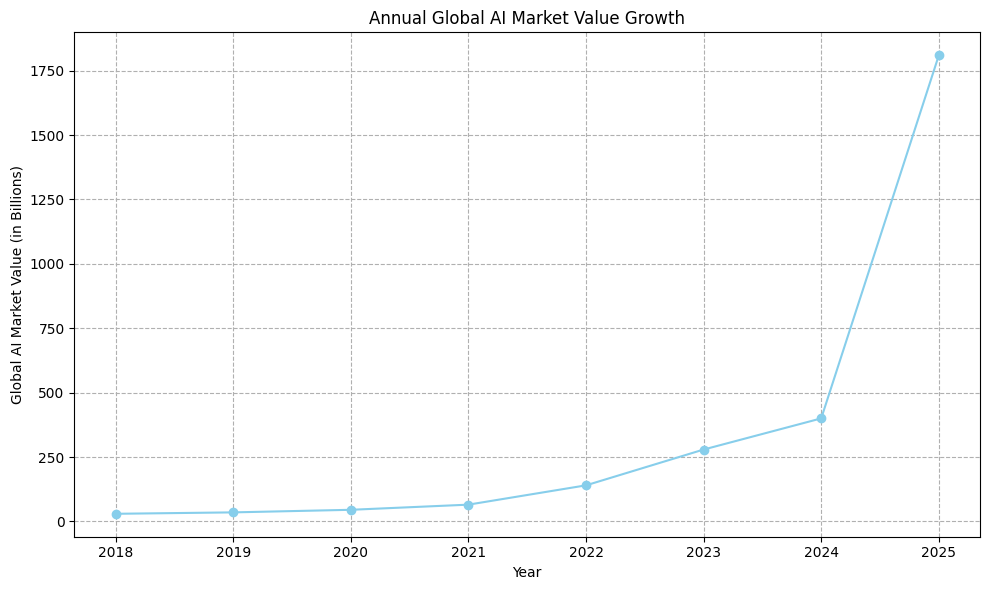

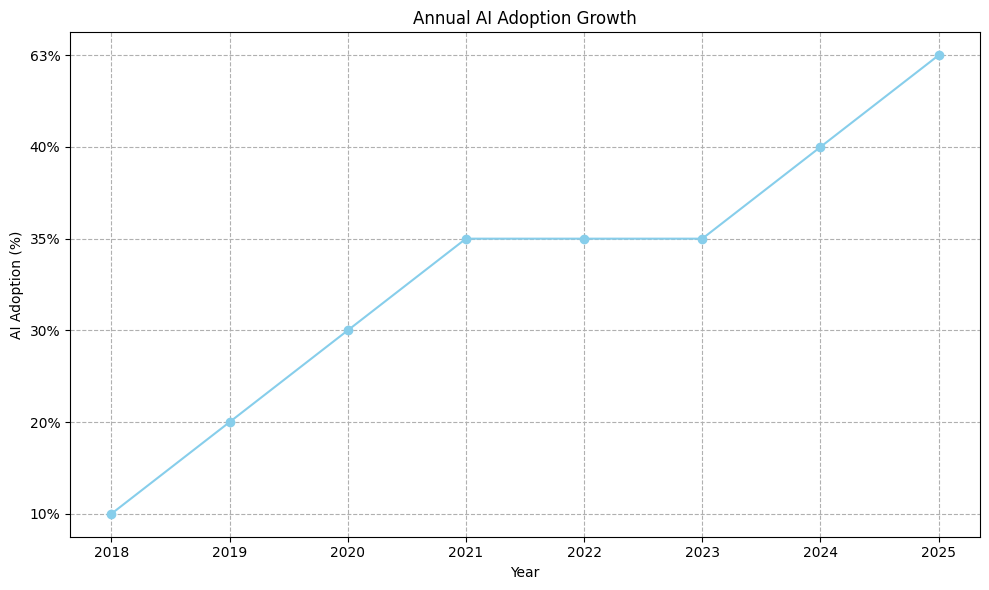

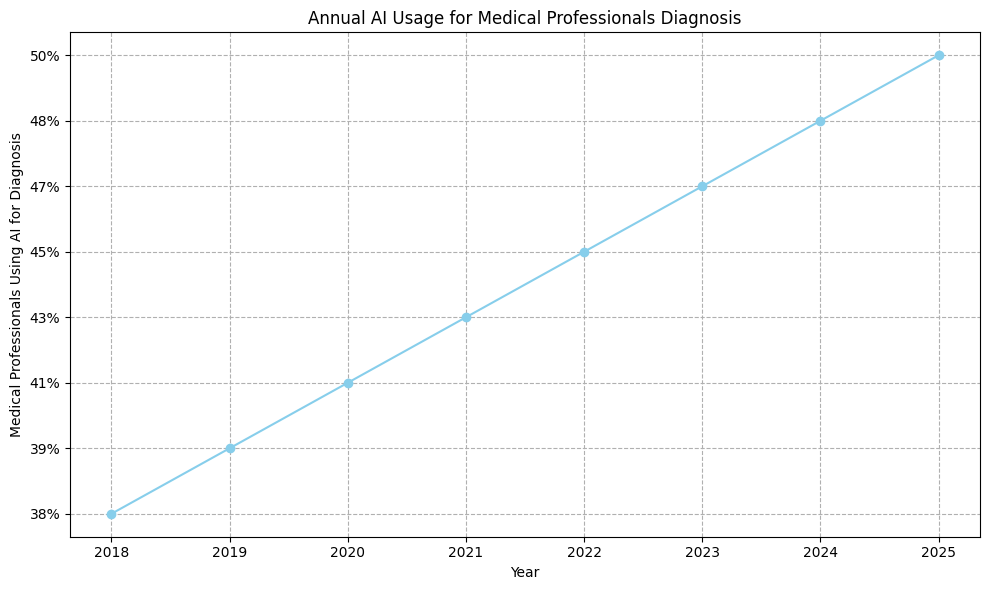

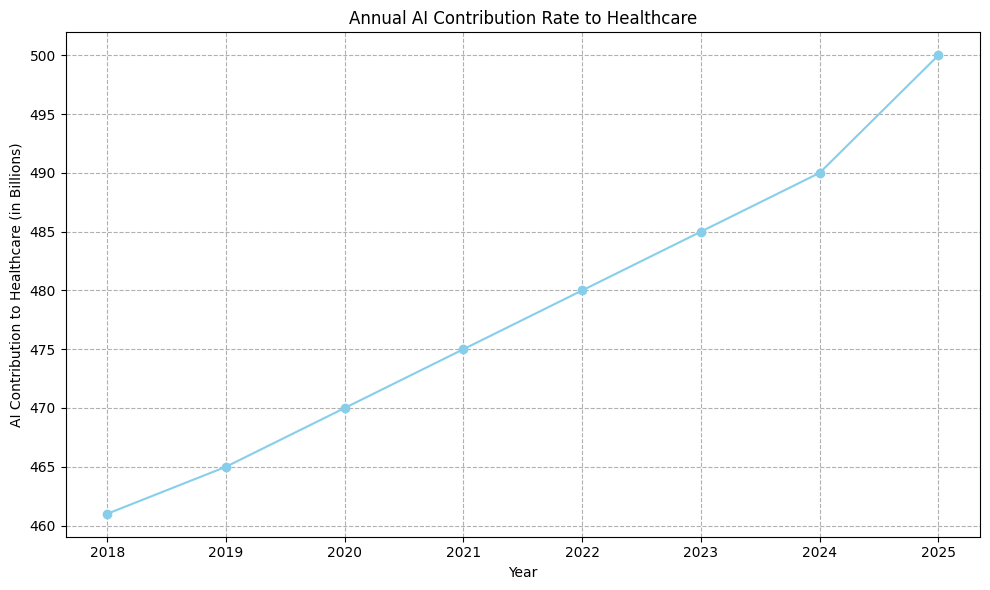

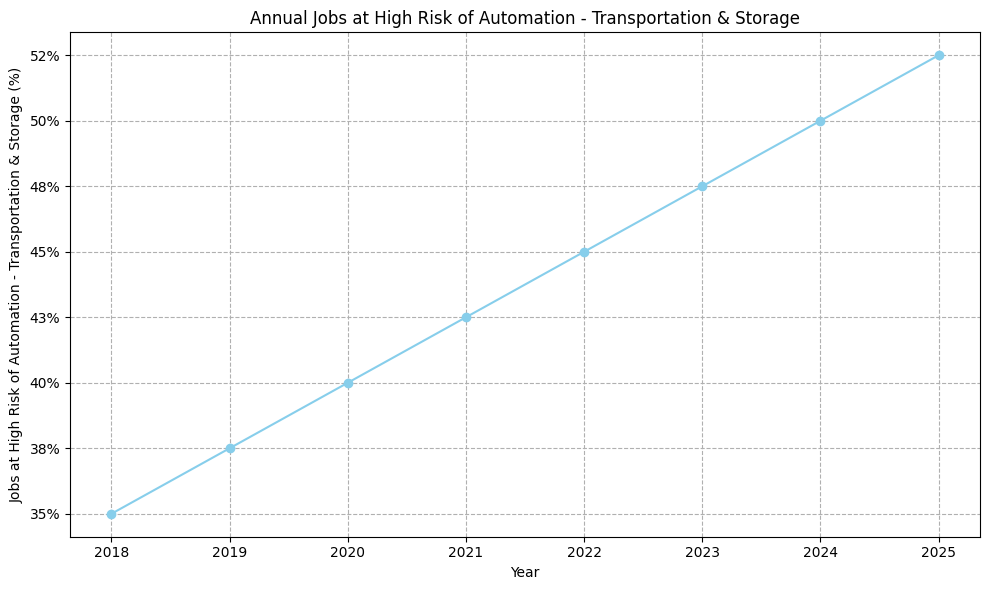

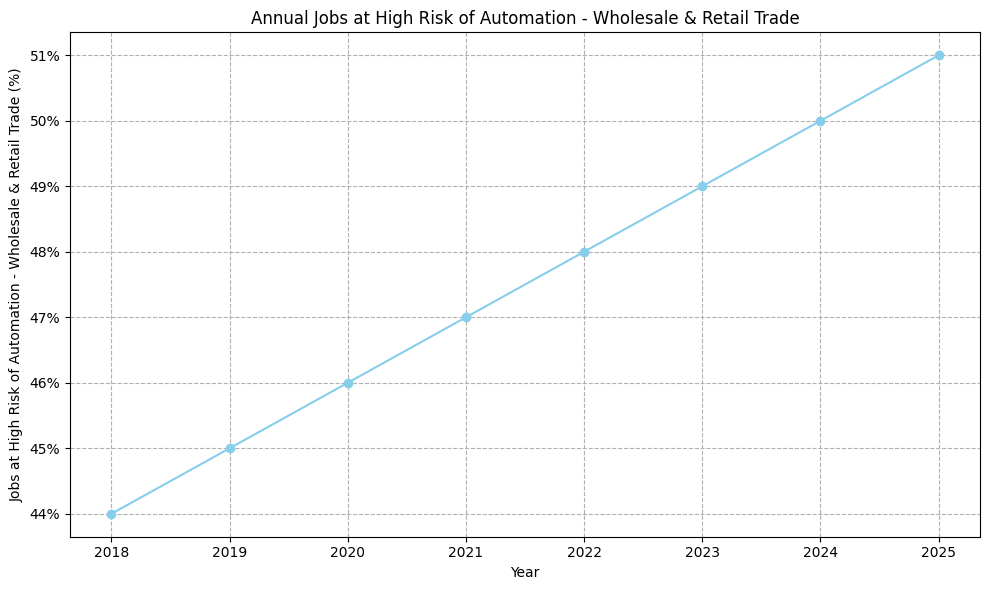

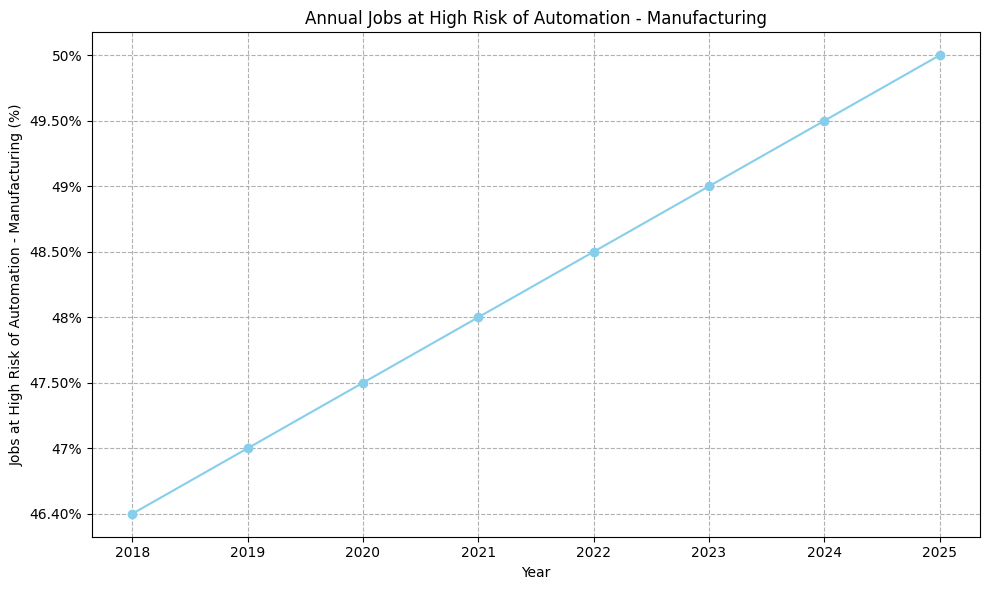

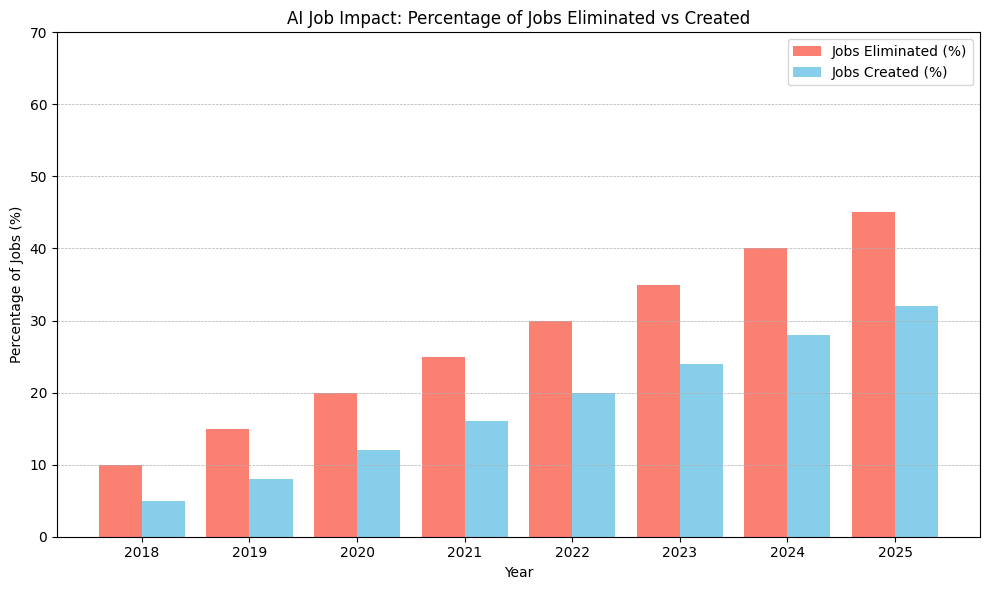

In [ ]:
# Access Kaggle dataset (download CSV to upload file)
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Access library
import matplotlib.pyplot as plt
# Read CSV with semicolon delimiter
df = pd.read_csv(filename, delimiter=';')
# Extract dataset columns
x = df['Year']
y = df['AI Software Revenue (in Billions)']
a = df['Global AI Market Value (in Billions)']
b = df['AI Adoption (%)']
c = df['Organizations Using AI']
d = df['Organizations Planning to Implement AI']
e = df['Global Expectation for AI Adoption (%)']
f = df['Estimated Jobs Eliminated by AI (Millions)'].str.replace('%', '').astype(float)
g = df['Estimated New Jobs Created by AI (Millions)'].str.replace('%', '').astype(float)
h = df['Net Job Loss in the US']
i = df['Organizations Believing AI Provides Competitive Edge']
j = df['Companies Prioritizing AI in Strategy']
k = df['Estimated Revenue Increase from AI (Trillions USD)']
l = df['Marketers Believing AI Improves Email Revenue']
m = df['Expected Increase in Employee Productivity Due to AI (%)']
n = df['Americans Using Voice Assistants (%)']
o = df['Digital Voice Assistants (Billions of Devices)']
p = df['Medical Professionals Using AI for Diagnosis']
q = df['AI Contribution to Healthcare (in Billions)']
r = df['Jobs at High Risk of Automation - Transportation & Storage (%)']
s = df['Jobs at High Risk of Automation - Wholesale & Retail Trade (%)']
t = df['Jobs at High Risk of Automation - Manufacturing (%)']
# Show diagram (1)
plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o', linestyle='-', color='skyblue')
plt.title('Annual AI Software Revenue Growth')
plt.xlabel('Year')
plt.ylabel('AI Software Revenue (in Billions)')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
# Show diagram (2)
plt.figure(figsize=(10,6))
plt.plot(x, a, marker='o', linestyle='-', color='skyblue')
plt.title('Annual Global AI Market Value Growth')
plt.xlabel('Year')
plt.ylabel('Global AI Market Value (in Billions)')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
# Show diagram (3)
plt.figure(figsize=(10,6))
plt.plot(x, b, marker='o', linestyle='-', color='skyblue')
plt.title('Annual AI Adoption Growth')
plt.xlabel('Year')
plt.ylabel('AI Adoption (%)')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
# Show diagram (4)
plt.figure(figsize=(10,6))
plt.plot(x, p, marker='o', linestyle='-', color='skyblue')
plt.title('Annual AI Usage for Medical Professionals Diagnosis')
plt.xlabel('Year')
plt.ylabel('Medical Professionals Using AI for Diagnosis')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
# Show diagram (5)
plt.figure(figsize=(10,6))
plt.plot(x, q, marker='o', linestyle='-', color='skyblue')
plt.title('Annual AI Contribution Rate to Healthcare')
plt.xlabel('Year')
plt.ylabel('AI Contribution to Healthcare (in Billions)')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
# Show diagram (6)
plt.figure(figsize=(10,6))
plt.plot(x, r, marker='o', linestyle='-', color='skyblue')
plt.title('Annual Jobs at High Risk of Automation - Transportation & Storage')
plt.xlabel('Year')
plt.ylabel('Jobs at High Risk of Automation - Transportation & Storage (%)')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
# Show diagram (7)
plt.figure(figsize=(10,6))
plt.plot(x, s, marker='o', linestyle='-', color='skyblue')
plt.title('Annual Jobs at High Risk of Automation - Wholesale & Retail Trade')
plt.xlabel('Year')
plt.ylabel('Jobs at High Risk of Automation - Wholesale & Retail Trade (%)')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
# Show diagram (8)
plt.figure(figsize=(10,6))
plt.plot(x, t, marker='o', linestyle='-', color='skyblue')
plt.title('Annual Jobs at High Risk of Automation - Manufacturing')
plt.xlabel('Year')
plt.ylabel('Jobs at High Risk of Automation - Manufacturing (%)')
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()
#Show diagram (9)
# Plot percentage bar chart
bar_width = 0.4
plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], f, width=bar_width, label='Jobs Eliminated (%)', color='salmon')
plt.bar([i + bar_width/2 for i in x], g, width=bar_width, label='Jobs Created (%)', color='skyblue')
plt.title('AI Job Impact: Percentage of Jobs Eliminated vs Created')
plt.xlabel('Year')
plt.ylabel('Percentage of Jobs (%)')
plt.ylim(0, 70)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()